### Laboratorio No.1 - Modelación y simulación 

In [14]:
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from scipy.special import erfinv

#### Ejercicio 1 - Propiedades de Distribución de Probabilidad
Genere una muestra aleatoria de 1000 puntos de datos de una distribución normal con media 0 y desviación
estándar 1.
Tasks:
1. Calcule e imprima la media, la varianza y la asimetría de la muestra.
2. Trace un histograma de los datos y observe su forma.
3. ¿Qué le dicen estas estadísticas sobre la tendencia central, la dispersión y la forma de los datos?

In [ ]:
def generateNormalDistribution():
    '''
        Generación de 1000 puntos de datos de distribución normal.
    '''
    mu, sigma = 0, 1
    return np.random.normal(mu, sigma, 1000)

In [ ]:
data = generateNormalDistribution()
meanValue = data.mean()
varValue = data.var()
asymmetry = skew(data)

print(meanValue)
print(varValue)
print(asymmetry)

In [ ]:
histo = plt.hist(data)
plt.title("Distribución de datos aleatorios")
histo

In [ ]:
if asymmetry == 0:
    print('Existe una distribución simétrica en los datos con un valor de asimetría de', asymmetry, '. Esto representa que los datos se encuentran distribuidos de una forma uniforme.')
elif asymmetry < 0:
    print('Existe una distribución asimétrica en los datos negativa con un valor de asimetría de', asymmetry, ';lo cual indica que los datos con una menor varianza se encuentran agrupados a la derecha.')
else:
    print('Existe una distribución asimétrica en los datos positiva con un valor de asimetría de', asymmetry, ';lo cual indica que los datos con una menor varianza se encuentran agrupados a la izquierda.')

_________________________________________________________________________________________________________

#### Ejercicio 2 - PDF & CDF
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución exponencial con parámetro de
tasa 0.5.
Tasks:
1. Trace la función de densidad de probabilidad (PDF) y la función de distribución acumulativa (CDF) de los
datos.
2. Calcule e imprima las probabilidades para intervalos específicos utilizando la CDF. (por lo menos 2
intervalos a su elección)
3. ¿Qué información puede obtener de la forma del PDF y el comportamiento de la CDF?

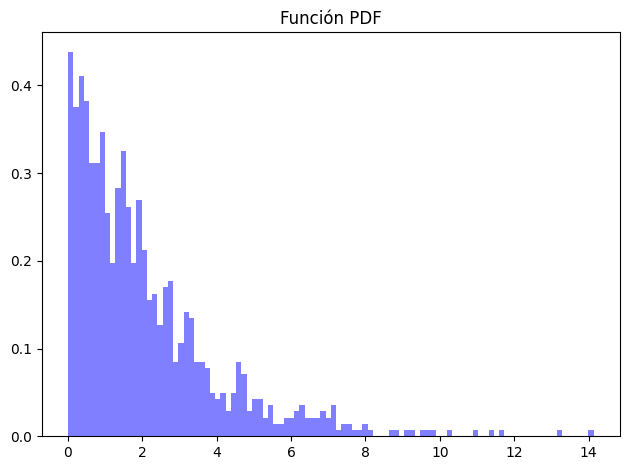

In [18]:
n = np.random.exponential(scale=1/0.5, size=1000)
tasa = 0.5
#PDF
plt.hist(n, bins=100, density=True, alpha = tasa, color = "blue")
plt.title('Función PDF')
plt.tight_layout()

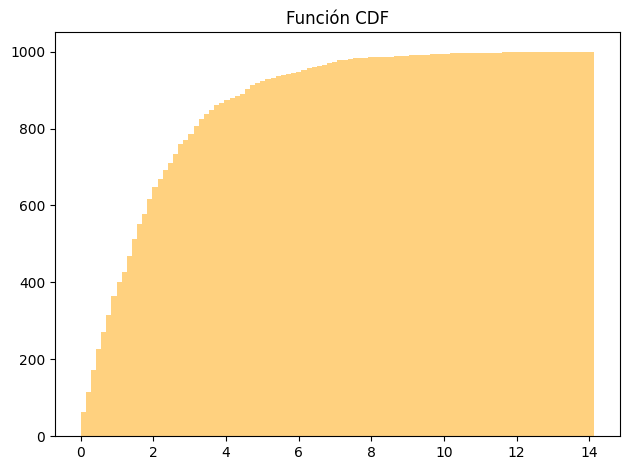

In [19]:
# CDF
plt.figure()
plt.hist(n, bins=100, cumulative=True, alpha=tasa, color = "orange")
plt.title('Función CDF')
plt.tight_layout()

In [20]:
Interval_1 = (0,5)
Interval_2 = (6,10)

prob1 = np.sum((n >= Interval_1[0]) & (n < Interval_1[1])) / 1000
prob2 = np.sum((n >= Interval_2[0]) & (n < Interval_2[1])) / 1000

print("-> Probabilidad para el intervalo de 0 a 5: ",prob1)
print("-> Probabilidad para el intervalo de 6 a 10: ",prob2)

-> Probabilidad para el intervalo de 0 a 5:  0.92
-> Probabilidad para el intervalo de 6 a 10:  0.05


Como se puede observar en los gráficos anteriores el gráfico CDF va creciendo a medida que se van realizando las iteraciones lo cual nos indica que este se va acercando más a su valor especifico. Ahora bien el el gráfico del PDF se puede observar una asímetria a la derecha y al mismo tiempo como es que con el paso de iteraciones esta va decreciendo y como es que con forme el paso de las iteraciones estas en algunos valores son nulos o con un valor inferior a 1.


_________________________________________________________________________________________________________

#### Ejercicio 3 - Bias & Kurtosis
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución beta con parámetros de forma
(2, 2).
Tasks:
1. Calcule e imprima el sesgo y la curtosis de la muestra.
2. Analice las implicaciones del sesgo y la curtosis en la forma y las características de la distribución.

In [16]:
def generateBetaDistribution():
    alpha = 2
    beta = 2
    return np.random.beta(alpha, beta, size=1000)

data = generateBetaDistribution()

In [17]:
data_kurtosis = kurtosis(data)
data_skewness = skew(data)
data_kurtosis, data_skewness

(-0.84273514737548, 0.0013068472873650097)

Al indicar un valor alpha y beta de 2 se espera que la distribución sea simétrica; con un sesgo bastante cercano a 0. Por lo tanto, los resultados obtenidos son coherentes con los parámetros indicados.

_________________________________________________________________________________________________________

#### Ejercicio 4 - Generación de Números aleatorios
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución de Poisson con parámetro
lambda 5.
Tasks:
1. Trace un histograma de los datos generados.
2. Calcule e imprima la media y la varianza de la muestra.
3. ¿Puedes observar algún patrón o tendencia en los datos generados a partir de la distribución de Poisson?


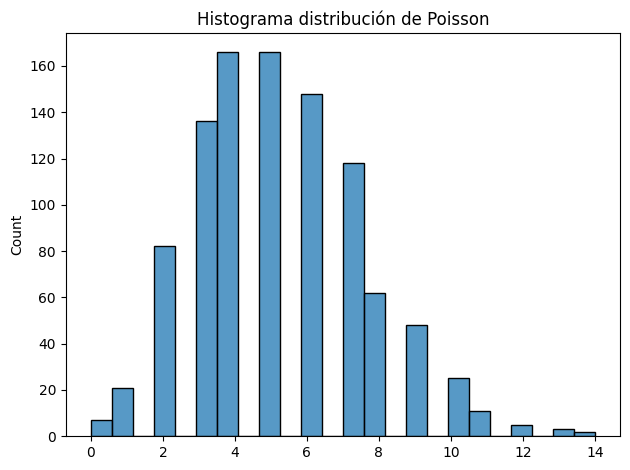

In [21]:
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

n = np.random.poisson(lam = 5, size = 1000)
sns.histplot(n)
plt.title('Histograma distribución de Poisson')
plt.tight_layout()

In [22]:
mean = np.mean(n)
variance = np.var(n)

print("Media de la población:", mean)
print("Varianza de la población:", variance)

Media de la población: 5.227
Varianza de la población: 5.473471


Como se puede observar en gráfio anterior este cuenta con una asimetría hacia la derecha lo cual nos indica que la distribución es positiva. Por otra parte, se puede observar que la barra en el 4to valor es el más elevado lo cual concuerda con la media dandonos a entender que este es el punto de equilibrio de esta y que este es el valor medio de los datos. Finalmente, podemos ver que la variabilida de la población podemos ver que los datos se encuentran dispersos en unidades de 4

_________________________________________________________________________________________________________

#### Ejercicio 5 - Muestreo
Muestree 500 puntos de datos de una distribución normal utilizando el método de transformación inversa.
Tasks:
1. Trace un histograma de los datos generados.
2. Compare el histograma con la PDF teórica de la distribución normal.
3. ¿La muestra generada representa con precisión la distribución normal subyacente?

In [15]:
def generateNormalDistributionInverse(mu, sigma):
    '''
        Generación de 1000 puntos de datos de distribución normal.
    '''
    mu, sigma = 0, 1
    uniform_random_numbers = np.random.rand(500)
    return mu + sigma * np.sqrt(2) * erfinv(2 * uniform_random_numbers - 1)

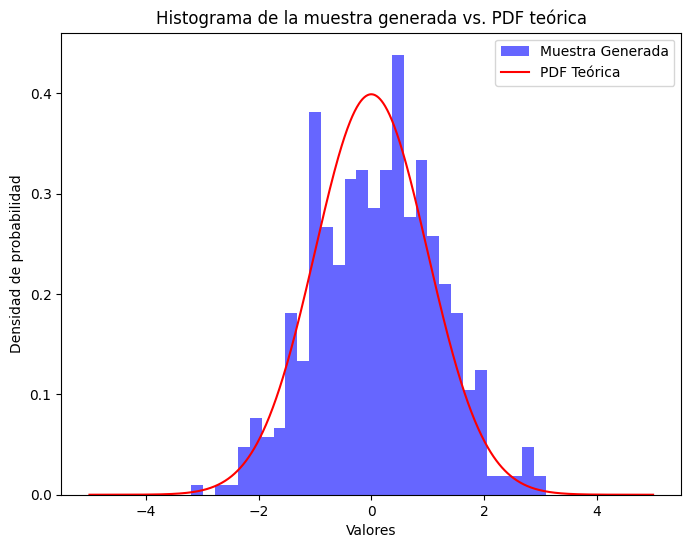

In [6]:
mu, sigma = 0, 1
sample = generateNormalDistributionInverse(mu, sigma)

# Histograma
plt.figure(figsize=(8, 6))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='blue', label='Muestra Generada')

# Histograma PDF teórica de la distribución normal
x = np.linspace(-5, 5, 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, pdf, color='red', label='PDF Teórica')

plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma de la muestra generada vs. PDF teórica')
plt.legend()
plt.show()

3. Sí, la muestra si representa la distribución normal pues como se observa en el histograma los datos se ajustan a la distribución esperada. Sin embargo, los datos no se ajustan en su totalidad pues la muestra es obtenida de forma aleatoria.

_________________________________________________________________________________________________________

#### Ejercicio 6 - Estimación de Parámetros
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución gamma con parámetro de forma
2 y parámetro de escala 3.
Tasks:
1. Utilice MLE para estimar los parámetros de forma y escala de la distribución gamma de la muestra.
2. ¿Qué tan cerca están los parámetros estimados de los parámetros verdaderos?
3. ¿Puede evaluar la bondad de ajuste de la distribución estimada a los datos observados?

In [23]:
import numpy as np
from scipy.stats import gamma
from scipy.optimize import minimize
import matplotlib.pyplot as plt

N = np.random.gamma(shape=2, scale=3, size=1000)

def gamma_likelihood(params):
    shape, scale = params
    log_likelihood = np.sum(np.log(np.power(N, shape-1) * np.exp(-N/scale)) - np.log(scale) - np.log(np.math.gamma(shape)))
    return -log_likelihood

initial_guess = [2, 3]  
result = minimize(gamma_likelihood, initial_guess, method='Nelder-Mead')
est_shape, est_scale = result.x

print("-- EJ.1 --")
print("Parámetro estimado de forma: ", est_shape)
print("Parámetro estimado de escala: ", est_scale)

print("\n-- EJ.2 --")
print("Diferencia entre estimación y real forma: ", est_shape-2)
print("Diferencia entre estimación y real escala: ", est_scale-3)

-- EJ.1 --
Parámetro estimado de forma:  5.099476345433471
Parámetro estimado de escala:  5.984157528932722

-- EJ.2 --
Diferencia entre estimación y real forma:  3.0994763454334713
Diferencia entre estimación y real escala:  2.9841575289327222


2. Como se puede observar los datos estimados se encuentran un poco lejanos de los reales puesto a que este es mayor a 2, esto se le podria atribuir a los datos que se esten generando con cada iteración.

3.

Text(0.5, 1.0, 'Comparación de Distribución Gamma Estimada y Datos Observados')

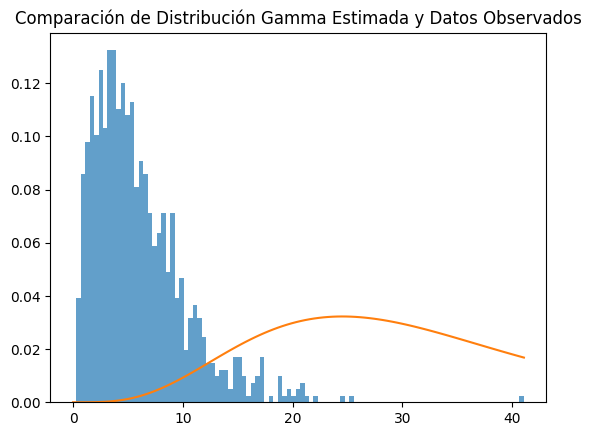

In [24]:
plt.hist(N, bins=100, density=True, alpha=0.7)
x = np.linspace(0, np.max(N), 100)
plt.plot(x, gamma.pdf(x, est_shape, scale=est_scale))
plt.title('Comparación de Distribución Gamma Estimada y Datos Observados')

_________________________________________________________________________________________________________

#### Ejercicio 7 - Distribuciones Multivariable
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución normal bivariada con vector
medio [0, 0] y matriz de covarianza [[1, 0,5], [0,5, 1]].
Tasks:
1. Visualice los puntos de datos en un diagrama de dispersión.
2. Calcula e imprime el coeficiente de correlación entre las dos variables.
3. ¿Qué información puede obtener sobre la relación entre las variables del diagrama de dispersión y el
coeficiente de correlación?

In [7]:
def generateMultivariableDistribution():
    # Establecer la media y matriz de covarianza
    mean = [0, 0]
    covariance_matrix = [[1, 0.5], [0.5, 1]]

    # Generar una muestra aleatoria bivariada
    np.random.seed(42)  # Para reproducibilidad
    return np.random.multivariate_normal(mean, covariance_matrix, size=1000)

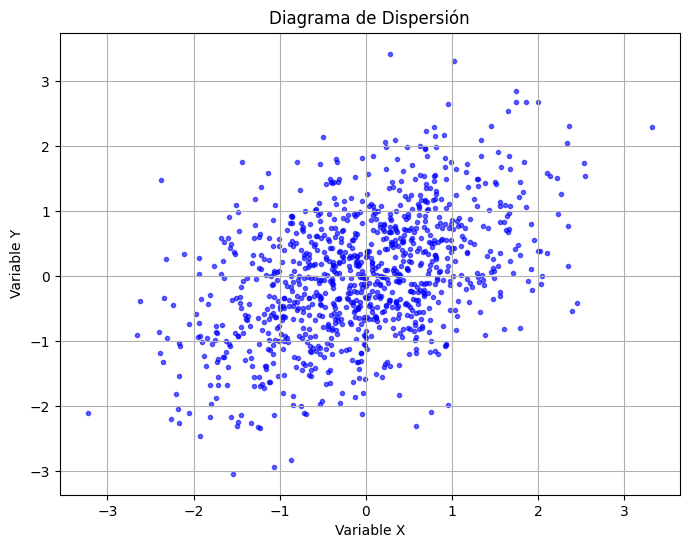

Coeficiente de correlación entre las dos variables: 0.45841752925533336


In [8]:
sample = generateMultivariableDistribution()

x = sample[:, 0]
y = sample[:, 1]

# Diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, marker='.', color='blue')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Diagrama de Dispersión')
plt.grid(True)
plt.show()

# Coeficiente de correlación entre las dos variables
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print("Coeficiente de correlación entre las dos variables:", correlation_coefficient)

El diagrama de dispersión nos permite ver de una forma gráfica los datos de forma bidimensional para entender cómo se relaciona la variable X con la variable Y. Mientras que la correlación explica la relación lineal entre ambas variables.

_________________________________________________________________________________________________________

##### Ejercicio 8- Goodness-of-Fit Test
Imagen adjunta 
